In [25]:
# from run_fit import *
# inst = 1-2
# ifield=4-8
# im = 0-3
# filt_order = 3
# fit_stacking_mcmc(inst, ifield, im ,filt_order).run_mcmc()
# joint_fit_mcmc(inst,im,filt_order).run_mcmc()
# fit_stacking_mcmc(inst, ifield, im ,filt_order).run_mcmc_2par()
# joint_fit_mcmc(inst,im,filt_order).run_mcmc_2par()

# 3 params

### corner

In [5]:
from run_fit import *
import corner
from PIL import Image

inst = 1

for ifield in [0,4,5,6,7,8]:
    if ifield==0:
        truths_arr = []
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        
        R200 = gal_profile_model().Wang19_profile(0,im)['params']['R200']
        xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
        Re2_W19 = R200 * xe2_W19
        
        if ifield==0:
            savedir = mypaths['alldat'] + 'TM' + str(inst) + '/'
            savename = 'mcmc_3par_joint' + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'
        else:
            savedir = mypaths['alldat'] + 'TM' + str(inst) + '/'
            savename = 'mcmc_3par_' + fieldnamedict[ifield] + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'

        samples = np.load(savedir + savename)
        steps, nwalkers, nparams = samples.shape

        flatsamps = samples.copy()
        flatsamps[:,:,0] = flatsamps[:,:,0] * R200
        # chain rejection
        chain_use_idx = []
        Nchain = flatsamps.shape[1]
        for i in range(Nchain):
            if not np.any(flatsamps[100:,i,1]>100):
                chain_use_idx.append(i)
        flatsamps = flatsamps[150:,chain_use_idx,:].reshape((-1,3))

        bins0 = np.linspace(np.min(flatsamps[:,0]), np.max(flatsamps[:,0]), 20)
        bins1 = np.linspace(np.min(flatsamps[:,1]), np.max(flatsamps[:,1]), 20)
        bins2 = np.linspace(np.min(flatsamps[:,2]), np.max(flatsamps[:,2]), 20)
        
        if ifield==0:
            truths_arr.append(np.median(flatsamps, axis=0))

        levels= 1.0 - np.exp(-0.5 * np.arange(1, 2.1, 1) ** 2)
        figure = corner.corner(flatsamps, levels = levels,fill_contours=True,plot_datapoints=False,
                               bins=[bins0, bins1, bins2],label_kwargs={'fontsize':'xx-large'},
                               range=[(0,5),(0,20),(0,200)],
                               title_kwargs={'fontsize':'x-large'},
                               show_titles=True,labels=["$R_{e_2}$", r"$A_{\rm 1h}$", r"$A_{\rm 2h}$"],
                               truths=[Re2_W19,1,1])
        if ifield==0:
            plt.savefig('plots/TM%d/mcmc_joint_m%d_%d.png'\
                        %(inst,m_min, m_max), dpi=150)
        else:
            plt.savefig('plots/TM%d/mcmc_%s_m%d_%d.png'\
                        %(inst,fieldnamedict[ifield], m_min, m_max), dpi=150)

        plt.close()
        

#combine four mag plots into one plot
for ifield in [0,4,5,6,7,8]:
    result = Image.new("RGB", (3200,800))    
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        fieldname = 'joint' if ifield==0 else fieldnamedict[ifield]
        fname = 'plots/TM%d/mcmc_%s_m%d_%d.png'\
                        %(inst, fieldname, m_min, m_max)
        path = os.path.expanduser(fname)
        img = Image.open(path)
        img.thumbnail((800, 800), Image.ANTIALIAS)
        x = im * 800
        y = 0
        w, h = img.size
        result.paste(img, (x, y, x + w, y + h))
        os.remove(fname)
    
    result.save(os.path.expanduser('plots/TM%d/mcmc_%s_3par.png'%(inst,fieldname)))

In [13]:
from run_fit import *
import corner
from PIL import Image

inst = 1

for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    figure1, ax = plt.subplots(3,3,figsize=(12,12))
    figure2, ax = plt.subplots(3,3,figsize=(12,12))

    R200 = gal_profile_model().Wang19_profile(0,im)['params']['R200']
    xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
    Re2_W19 = R200 * xe2_W19
    for ifield in [4,5,6,7,8,0]:
        if im==0 and ifield==0:
            # the coner plot fail on this one
            continue
        if ifield==0:
            savedir = mypaths['alldat'] + 'TM' + str(inst) + '/'
            savename = 'mcmc_3par_joint' + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'
            c = 'k'
        else:
            savedir = mypaths['alldat'] + 'TM' + str(inst) + '/'
            savename = 'mcmc_3par_' + fieldnamedict[ifield] + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'
            c = 'C' + str(ifield-4)

        samples = np.load(savedir + savename)
        steps, nwalkers, nparams = samples.shape

        flatsamps = samples.copy()
        flatsamps[:,:,0] = flatsamps[:,:,0] * R200
        # chain rejection
        chain_use_idx = []
        Nchain = flatsamps.shape[1]
        for i in range(Nchain):
            if not np.any(flatsamps[100:,i,1]>100):
                chain_use_idx.append(i)
        flatsamps = flatsamps[150:,chain_use_idx,:].reshape((-1,3))

        bins0 = np.linspace(np.min(flatsamps[:,0]), np.max(flatsamps[:,0]), 20)
        bins1 = np.linspace(np.min(flatsamps[:,1]), np.max(flatsamps[:,1]), 20)
        bins2 = np.linspace(np.min(flatsamps[:,2]), np.max(flatsamps[:,2]), 20)
        
        levels= 1.0 - np.exp(-0.5 * np.array([1]) ** 2)
        figure = corner.corner(flatsamps, levels = levels,fill_contours=False,color=c,
                               plot_datapoints=False,
                               bins=[bins0, bins1, bins2],label_kwargs={'fontsize':'xx-large'},
                               range=[(0,5),(0,20),(0,200)],
                               title_kwargs={'fontsize':'x-large'},
                               show_titles=True,labels=["$R_{e_2}$", r"$A_{\rm 1h}$", r"$A_{\rm 2h}$"],
                               fig=figure1)

        levels= 1.0 - np.exp(-0.5 * np.array([2]) ** 2)
        figure = corner.corner(flatsamps, levels = levels,fill_contours=False,color=c,
                               plot_datapoints=False,
                               bins=[bins0, bins1, bins2],label_kwargs={'fontsize':'xx-large'},
                               range=[(0,5),(0,20),(0,200)],
                               title_kwargs={'fontsize':'x-large'},
                               show_titles=True,labels=["$R_{e_2}$", r"$A_{\rm 1h}$", r"$A_{\rm 2h}$"],
                               fig=figure2)
        
    figure1.savefig('plots/TM%d/mcmc_m%d_%d_1sig.png'\
                %(inst, m_min, m_max), dpi=150)
    figure2.savefig('plots/TM%d/mcmc_m%d_%d_2sig.png'\
                %(inst, m_min, m_max), dpi=150)
    
    plt.close(figure1)
    plt.close(figure2)
#combine four mag plots into one plot
result = Image.new("RGB", (3200,800))    
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    fname = 'plots/TM%d/mcmc_m%d_%d_1sig.png'\
                    %(inst, m_min, m_max)
    path = os.path.expanduser(fname)
    img = Image.open(path)
    img.thumbnail((800, 800), Image.ANTIALIAS)
    x = im * 800
    y = 0
    w, h = img.size
    result.paste(img, (x, y, x + w, y + h))
    os.remove(fname)
    
    result.save(os.path.expanduser('plots/TM%d/mcmc_1sig_3par.png'%(inst)))

result = Image.new("RGB", (3200,800))    
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):    
    fname = 'plots/TM%d/mcmc_m%d_%d_2sig.png'\
                    %(inst, m_min, m_max)
    path = os.path.expanduser(fname)
    img = Image.open(path)
    img.thumbnail((800, 800), Image.ANTIALIAS)
    x = im * 800
    y = 0
    w, h = img.size
    result.paste(img, (x, y, x + w, y + h))
    os.remove(fname)
    
    result.save(os.path.expanduser('plots/TM%d/mcmc_2sig_3par.png'%(inst)))

### 1D profile

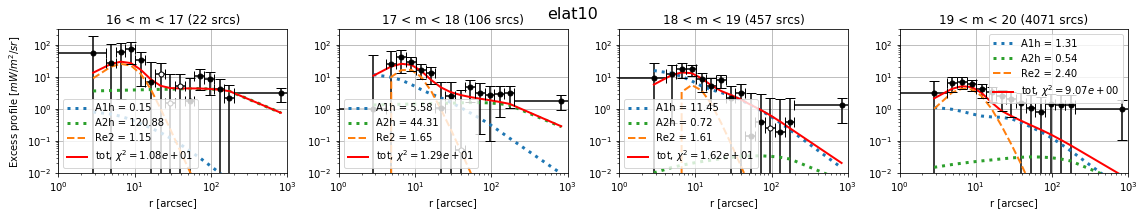

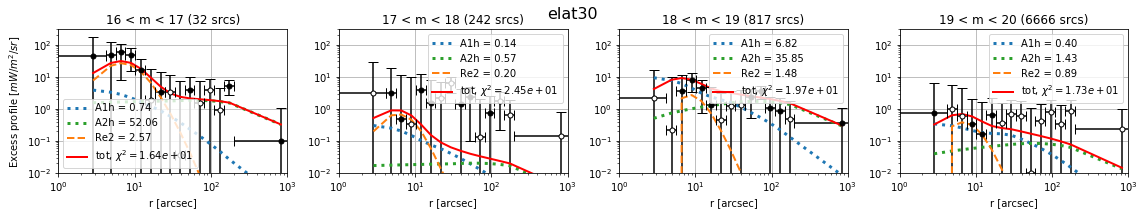

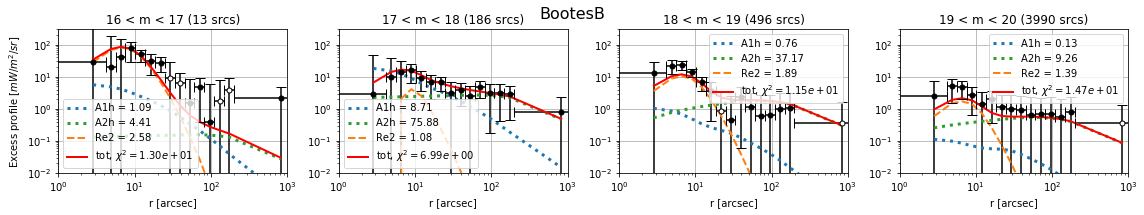

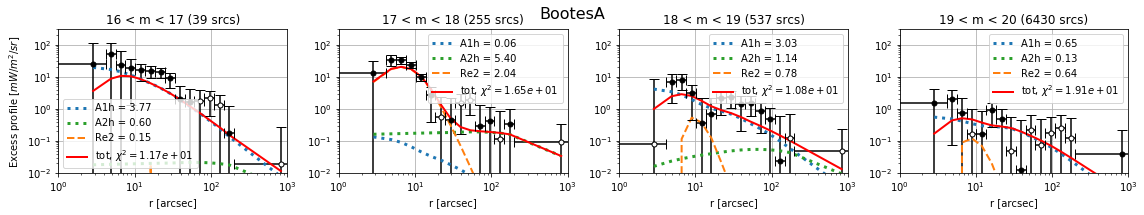

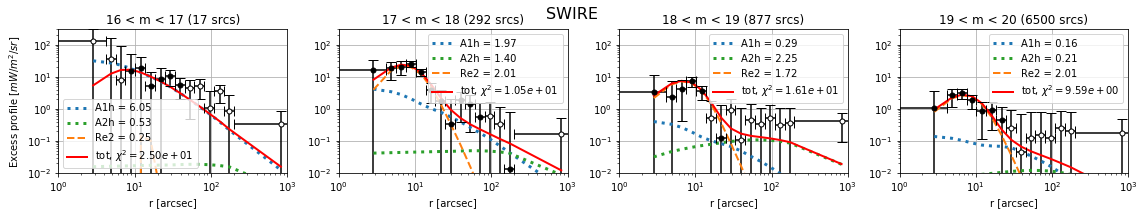

In [28]:
from run_fit import *

inst = 1
filt_order = 3
for ifield in [4,5,6,7,8]:
    fig, ax = plt.subplots(1, 4, figsize = (16,3))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        param_fit = fit_stacking_mcmc(inst, ifield, im, filt_order)
        fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=ifield)
        Re2 = fitparamdat['Re2']
        A1h = fitparamdat['A1h']
        A2h = fitparamdat['A2h']
        Nsrc = param_fit.Nsrc
        r_arr = param_fit.rsubbins
        profd_arr = param_fit.profex_sub
        profd_err = np.sqrt(np.diag(param_fit.covsub))
        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
        profex_arr = modelprof['profex_sub']
        prof1h_arr = modelprof['prof1h_sub']
        prof2h_arr = modelprof['prof2h_sub']
        chi2 = param_fit.get_chi2(Re2=Re2, A1h=A1h, A2h=A2h)
        rbinedges = param_fit.rsubbinedges
        ax[im].loglog(r_arr, prof1h_arr,'C0:', lw=3, label='A1h = %.2f'%A1h)
        ax[im].loglog(r_arr, prof2h_arr,'C2:', lw=3, label='A2h = %.2f'%A2h)
        ax[im].loglog(r_arr, profex_arr,'C1--', lw=2, label='Re2 = %.2f'%Re2)
        ax[im].loglog(r_arr, profex_arr + prof1h_arr + prof2h_arr,'r-', lw=2,
                     label = r'tot, $\chi^2=%.2e$'%chi2)
        
        plot_err_log(r_arr, 
                     profd_arr,
                     profd_err,
                     xedges = rbinedges,
                     ax=ax[im], color='k')


        ax[im].set_title('%d < m < %d (%d srcs)'%(m_min, m_max, Nsrc))
        ax[im].set_ylim([1e-2,3e2])
        ax[im].set_xlim([1e0,1e3])
        ax[im].grid()
        ax[im].legend()
        ax[im].set_xlabel('r [arcsec]')
    ax[0].set_ylabel('Excess profile [$mW/m^2/sr$]')
    fig.suptitle(fieldnamedict[ifield], fontsize=16)

    plt.tight_layout()
    plt.savefig('plots/TM%d/profile_best_%s_3par.png'%(inst,param_fit.field), dpi = 150)

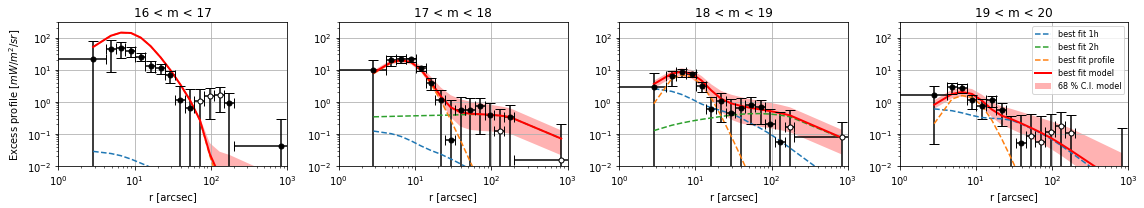

In [7]:
#
from run_fit import *

filt_order = 3
inst = 1
fig, ax = plt.subplots(1, 4, figsize = (16,3))
for im in range(4):
    fitparamdat = get_mcmc_fit_params_3par(inst,im)
    Re2, A1h, A2h = fitparamdat['Re2'], fitparamdat['A1h'], fitparamdat['A2h'],
    Re2_low, A1h_low, A2h_low = fitparamdat['Re2_low'], fitparamdat['A1h_low'], fitparamdat['A2h_low']
    Re2_high, A1h_high, A2h_high = fitparamdat['Re2_high'], fitparamdat['A1h_high'], fitparamdat['A2h_high']
    
    profd_arr, profd_err = 0, 0
    profex_arr, profex_arr_low, profex_arr_high = 0, 0, 0
    prof1h_arr, prof1h_arr_low, prof1h_arr_high = 0, 0, 0
    prof2h_arr, prof2h_arr_low, prof2h_arr_high = 0, 0, 0
    for ifield in [4,5,6,7,8]:
        param_fit = fit_stacking_mcmc(inst, ifield, im, filt_order)

        profd_arri = param_fit.profex_sub
        profd_erri = np.sqrt(np.diag(param_fit.covsub))
        profd_arr += profd_arri / profd_erri**2
        profd_err += 1 / profd_erri**2

        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
        profex_arri = modelprof['profex_sub']
        prof1h_arri = modelprof['prof1h_sub']
        prof2h_arri = modelprof['prof2h_sub']
        profex_arr += profex_arri
        prof1h_arr += prof1h_arri
        prof2h_arr += prof2h_arri
        
        modelprof = param_fit.get_profexcess_model(Re2=Re2_low, A1h=A1h_low, A2h=A2h_low)
        profex_arri = modelprof['profex_sub']
        prof1h_arri = modelprof['prof1h_sub']
        prof2h_arri = modelprof['prof2h_sub']
        profex_arr_low += profex_arri
        prof1h_arr_low += prof1h_arri
        prof2h_arr_low += prof2h_arri

        modelprof = param_fit.get_profexcess_model(Re2=Re2_high, A1h=A1h_high, A2h=A2h_high)
        profex_arri = modelprof['profex_sub']
        prof1h_arri = modelprof['prof1h_sub']
        prof2h_arri = modelprof['prof2h_sub']
        profex_arr_high += profex_arri
        prof1h_arr_high += prof1h_arri
        prof2h_arr_high += prof2h_arri

    profex_arr /= 5
    profex_arr_low /= 5
    profex_arr_high /= 5
    prof1h_arr /= 5
    prof1h_arr_low /= 5
    prof1h_arr_high /= 5
    prof2h_arr /= 5
    prof2h_arr_low /= 5
    prof2h_arr_high /= 5
    profd_arr /= profd_err
    profd_err = np.sqrt(1 / profd_err)
    
    r_arr = param_fit.rsubbins
    rbinedges = param_fit.rsubbinedges

    ax[im].loglog(r_arr, prof1h_arr,'C0--', label='best fit 1h')
    ax[im].loglog(r_arr, prof2h_arr,'C2--', label='best fit 2h')
    ax[im].loglog(r_arr, profex_arr,'C1--', label='best fit profile')
    ax[im].loglog(r_arr, profex_arr + prof1h_arr + prof2h_arr,'r-', lw=2, label='best fit model')
    ax[im].fill_between(r_arr, profex_arr_low + prof1h_arr_low + prof2h_arr_low,
                       profex_arr_high + prof1h_arr_high + prof2h_arr_high, facecolor='r', alpha=0.3,
                       label='68 % C.I. model')
    
    plot_err_log(r_arr, 
                 profd_arr,
                 profd_err,
                 xedges = rbinedges,
                 ax=ax[im], color='k')

    ax[im].set_title('%d < m < %d'%(param_fit.m_min, param_fit.m_max))
    ax[im].set_ylim([1e-2,3e2])
    ax[im].set_xlim([1e0,1e3])
    ax[im].grid()
    ax[im].set_xlabel('r [arcsec]')
ax[im].legend(fontsize=8,loc=1)
ax[0].set_ylabel('Excess profile [$mW/m^2/sr$]')

plt.tight_layout()
plt.savefig('plots/TM%d/profile_best_joint_3par.png'%inst, dpi = 200, bbox_inches='tight')

### marginalized params

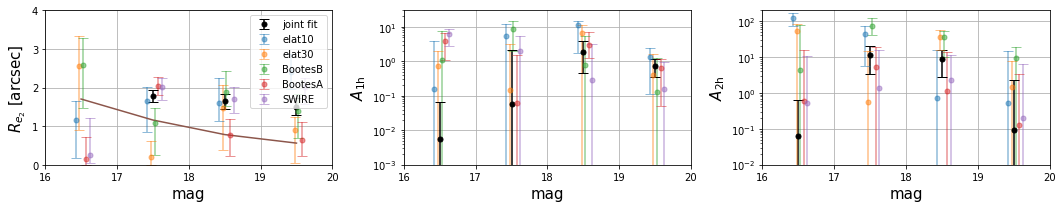

In [18]:
from run_fit import *

inst = 1
fig, ax = plt.subplots(1, 3, figsize = (15,3))
for ifield in [None,4,5,6,7,8]:
    xoff = 0 if ifield is None else (ifield-5.5)*0.05
    Re2_W19_arr = np.zeros(4)
    Re2_arr = np.zeros(4)
    A1h_arr = np.zeros(4)
    A2h_arr = np.zeros(4)
    Re2_low_arr = np.zeros(4)
    A1h_low_arr = np.zeros(4)
    A2h_low_arr = np.zeros(4)
    Re2_high_arr = np.zeros(4)
    A1h_high_arr = np.zeros(4)
    A2h_high_arr = np.zeros(4)
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        R200 = gal_profile_model().Wang19_profile(0,im)['params']['R200']
        xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
        Re2_W19 = R200 * xe2_W19
        Re2_W19_arr[im] = Re2_W19

        fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=ifield)
        Re2_arr[im] = fitparamdat['Re2']
        A1h_arr[im] = fitparamdat['A1h']
        A2h_arr[im] = fitparamdat['A2h']
        Re2_low_arr[im] = fitparamdat['Re2_low']
        A1h_low_arr[im] = fitparamdat['A1h_low']
        A2h_low_arr[im] = fitparamdat['A2h_low']
        Re2_high_arr[im] = fitparamdat['Re2_high']
        A1h_high_arr[im] = fitparamdat['A1h_high']
        A2h_high_arr[im] = fitparamdat['A2h_high']

    m_arr = (np.array(magbindict['m_min']) + np.array(magbindict['m_max'])) / 2

    if ifield is None:
        ax[0].errorbar(m_arr+xoff, Re2_arr, [Re2_arr - Re2_low_arr, Re2_high_arr - Re2_arr],
                      fmt='.', capsize=5, markersize=10, c='k', label = 'joint fit')
        ax[1].errorbar(m_arr+xoff, A1h_arr, [A1h_arr - A1h_low_arr, A1h_high_arr - A1h_arr],
                      fmt='.', capsize=5, markersize=10, c='k', label = 'joint fit')
        ax[2].errorbar(m_arr+xoff, A2h_arr, [A2h_arr - A2h_low_arr, A2h_high_arr - A2h_arr],
                      fmt='.', capsize=5, markersize=10, c='k', label = 'joint fit')
    else:
        ax[0].errorbar(m_arr+xoff, Re2_arr, [Re2_arr - Re2_low_arr, Re2_high_arr - Re2_arr],
                      fmt='.', capsize=5, markersize=10, alpha = 0.5, label = fieldnamedict[ifield])
        ax[1].errorbar(m_arr+xoff, A1h_arr, [A1h_arr - A1h_low_arr, A1h_high_arr - A1h_arr],
                      fmt='.', capsize=5, markersize=10, label = fieldnamedict[ifield], alpha = 0.5)
        ax[2].errorbar(m_arr+xoff, A2h_arr, [A2h_arr - A2h_low_arr, A2h_high_arr - A2h_arr],
                      fmt='.', capsize=5, markersize=10, label = fieldnamedict[ifield], alpha = 0.5)

ax[0].plot(m_arr, Re2_W19_arr)
ax[0].legend()
ax[0].set_ylim([0,4])
ax[1].set_ylim([1e-3,3e1])
ax[2].set_ylim([1e-2,2e2])
ax[0].set_xlabel('mag', fontsize=15)
ax[1].set_xlabel('mag', fontsize=15)
ax[2].set_xlabel('mag', fontsize=15)
ax[0].set_ylabel(r"$R_{e_2}$ [arcsec]", fontsize=15)
ax[1].set_ylabel(r"$A_{\rm 1h}$", fontsize=15)
ax[2].set_ylabel(r"$A_{\rm 2h}$", fontsize=15)
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_xticks([16,17,18,19,20])
ax[1].set_xticks([16,17,18,19,20])
ax[2].set_xticks([16,17,18,19,20])
ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.tight_layout()
# plt.savefig('plots/TM%d/params_best_3par.png'%inst, dpi = 150)

# 2 params

### corner

In [10]:
from run_fit import *
import corner
from PIL import Image

inst = 1

for ifield in [4,5,6,7,8]:
    if ifield==0:
        truths_arr = []
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        
        R200 = gal_profile_model().Wang19_profile(0,im)['params']['R200']
        xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
        Re2_W19 = R200 * xe2_W19
        
        if ifield==0:
            savedir = mypaths['alldat'] + 'TM' + str(inst) + '/'
            savename = 'mcmc_2par_joint' + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'
        else:
            savedir = mypaths['alldat'] + 'TM' + str(inst) + '/'
            savename = 'mcmc_2par_' + fieldnamedict[ifield] + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'

        samples = np.load(savedir + savename)
        steps, nwalkers, nparams = samples.shape

        flatsamps = samples.copy()
        flatsamps[:,:,0] = flatsamps[:,:,0] * R200
        flatsamps = flatsamps[150:,:,:].reshape((-1,2))

        bins0 = np.linspace(np.min(flatsamps[:,0]), np.max(flatsamps[:,0]), 20)
        bins1 = np.linspace(np.min(flatsamps[:,1]), np.max(flatsamps[:,1]), 20)
        
        if ifield==0:
            truths_arr.append(np.median(flatsamps, axis=0))

        levels= 1.0 - np.exp(-0.5 * np.arange(1, 2.1, 1) ** 2)
        figure = corner.corner(flatsamps, levels = levels,fill_contours=True,plot_datapoints=False,
                               bins=[bins0, bins1],label_kwargs={'fontsize':'xx-large'},
                               range=[(0,5),(0,200)],
                               title_kwargs={'fontsize':'x-large'},
                               show_titles=True,labels=["$R_{e_2}$",r"$A_{\rm 2h}$"],
                               truths=[Re2_W19,1,1])
        if ifield==0:
            plt.savefig('plots/TM%d/mcmc_joint_m%d_%d.png'\
                        %(inst,m_min, m_max), dpi=150)
        else:
            plt.savefig('plots/TM%d/mcmc_%s_m%d_%d.png'\
                        %(inst,fieldnamedict[ifield], m_min, m_max), dpi=150)

        plt.close()
        

#combine four mag plots into one plot
for ifield in [4,5,6,7,8]:
    result = Image.new("RGB", (3200,800))    
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        fieldname = 'joint' if ifield==0 else fieldnamedict[ifield]
        fname = 'plots/TM%d/mcmc_%s_m%d_%d.png'\
                        %(inst, fieldname, m_min, m_max)
        path = os.path.expanduser(fname)
        img = Image.open(path)
        img.thumbnail((800, 800), Image.ANTIALIAS)
        x = im * 800
        y = 0
        w, h = img.size
        result.paste(img, (x, y, x + w, y + h))
        os.remove(fname)
    
    result.save(os.path.expanduser('plots/TM%d/mcmc_%s_2par.png'%(inst,fieldname)))

In [12]:
from run_fit import *
import corner
from PIL import Image

inst = 1

for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    figure1, ax = plt.subplots(2,2,figsize=(8,8))
    figure2, ax = plt.subplots(2,2,figsize=(8,8))

    R200 = gal_profile_model().Wang19_profile(0,im)['params']['R200']
    xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
    Re2_W19 = R200 * xe2_W19
    for ifield in [4,5,6,7,8]:
        if im==0 and ifield==0:
            # the coner plot fail on this one
            continue
        if ifield==0:
            savedir = mypaths['alldat'] + 'TM' + str(inst) + '/'
            savename = 'mcmc_2par_joint' + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'
            c = 'k'
        else:
            savedir = mypaths['alldat'] + 'TM' + str(inst) + '/'
            savename = 'mcmc_2par_' + fieldnamedict[ifield] + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'
            c = 'C' + str(ifield-4)

        samples = np.load(savedir + savename)
        steps, nwalkers, nparams = samples.shape

        flatsamps = samples.copy()
        flatsamps[:,:,0] = flatsamps[:,:,0] * R200
        flatsamps = flatsamps[150:,:,:].reshape((-1,2))

        bins0 = np.linspace(np.min(flatsamps[:,0]), np.max(flatsamps[:,0]), 20)
        bins1 = np.linspace(np.min(flatsamps[:,1]), np.max(flatsamps[:,1]), 20)
        
        levels= 1.0 - np.exp(-0.5 * np.array([1]) ** 2)
        figure = corner.corner(flatsamps, levels = levels,fill_contours=False,color=c,
                               plot_datapoints=False,
                               bins=[bins0, bins1],label_kwargs={'fontsize':'xx-large'},
                               range=[(0,5),(0,200)],
                               title_kwargs={'fontsize':'x-large'},
                               show_titles=True,labels=["$R_{e_2}$",r"$A_{\rm 2h}$"],
                               fig=figure1)

        levels= 1.0 - np.exp(-0.5 * np.array([2]) ** 2)
        figure = corner.corner(flatsamps, levels = levels,fill_contours=False,color=c,
                               plot_datapoints=False,
                               bins=[bins0, bins1],label_kwargs={'fontsize':'xx-large'},
                               range=[(0,5),(0,200)],
                               title_kwargs={'fontsize':'x-large'},
                               show_titles=True,labels=["$R_{e_2}$", r"$A_{\rm 2h}$"],
                               fig=figure2)
        
    figure1.savefig('plots/TM%d/mcmc_m%d_%d_1sig.png'\
                %(inst, m_min, m_max), dpi=150)
    figure2.savefig('plots/TM%d/mcmc_m%d_%d_2sig.png'\
                %(inst, m_min, m_max), dpi=150)
    
    plt.close(figure1)
    plt.close(figure2)
#combine four mag plots into one plot
result = Image.new("RGB", (3200,800))    
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    fname = 'plots/TM%d/mcmc_m%d_%d_1sig.png'\
                    %(inst, m_min, m_max)
    path = os.path.expanduser(fname)
    img = Image.open(path)
    img.thumbnail((800, 800), Image.ANTIALIAS)
    x = im * 800
    y = 0
    w, h = img.size
    result.paste(img, (x, y, x + w, y + h))
    os.remove(fname)
    
    result.save(os.path.expanduser('plots/TM%d/mcmc_1sig_2par.png'%(inst)))

result = Image.new("RGB", (3200,800))    
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):    
    fname = 'plots/TM%d/mcmc_m%d_%d_2sig.png'\
                    %(inst, m_min, m_max)
    path = os.path.expanduser(fname)
    img = Image.open(path)
    img.thumbnail((800, 800), Image.ANTIALIAS)
    x = im * 800
    y = 0
    w, h = img.size
    result.paste(img, (x, y, x + w, y + h))
    os.remove(fname)
    
    result.save(os.path.expanduser('plots/TM%d/mcmc_2sig_2par.png'%(inst)))

### 1D profile

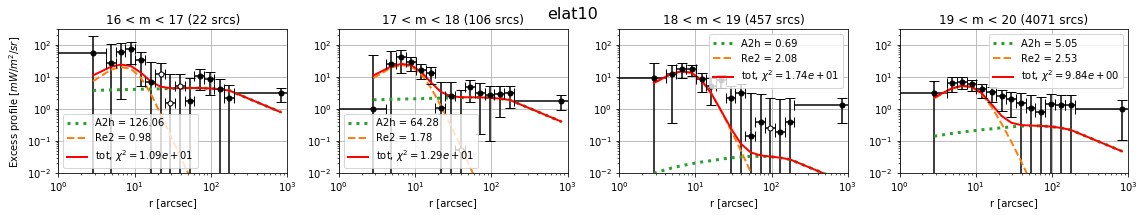

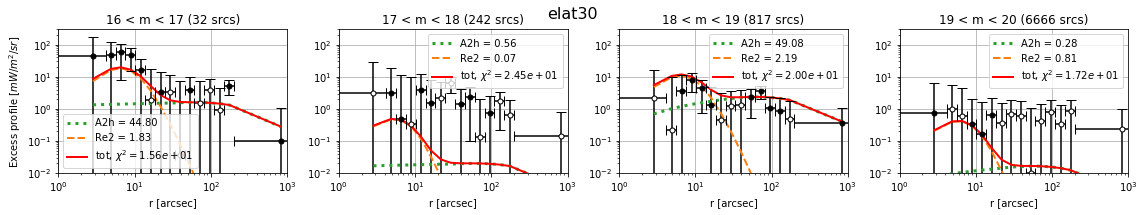

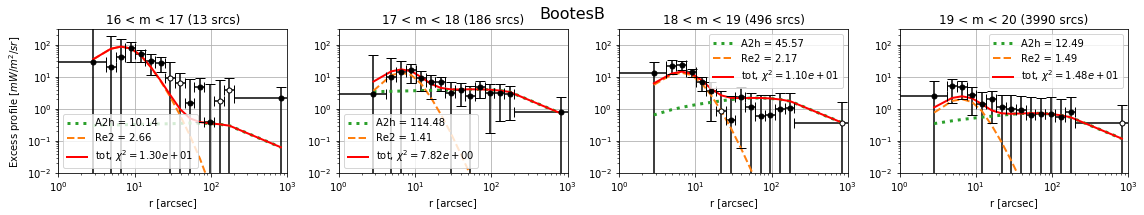

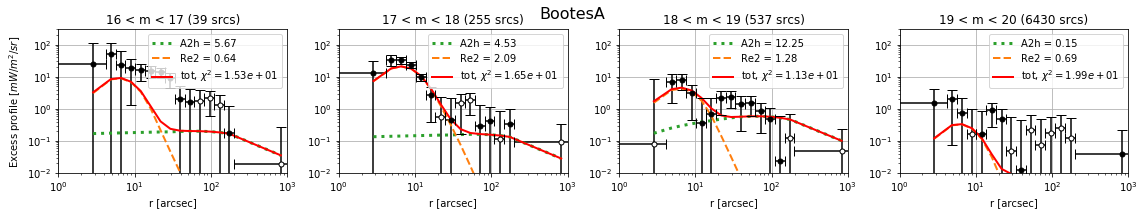

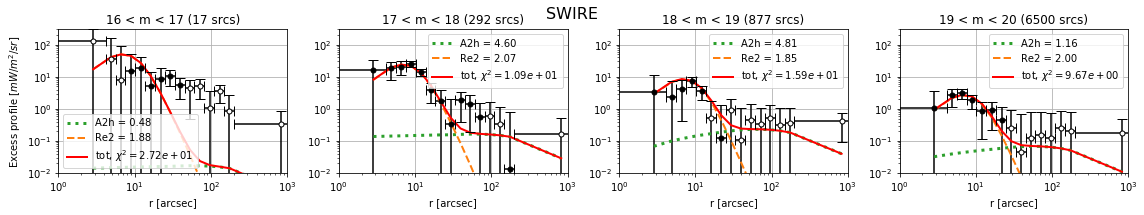

In [33]:
from run_fit import *

inst = 1
filt_order = 3
for ifield in [4,5,6,7,8]:
    fig, ax = plt.subplots(1, 4, figsize = (16,3))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        param_fit = fit_stacking_mcmc(inst, ifield, im, filt_order)
        fitparamdat = get_mcmc_fit_params_2par(inst,im, ifield=ifield)
        Re2 = fitparamdat['Re2']
        A2h = fitparamdat['A2h']
        Nsrc = param_fit.Nsrc
        r_arr = param_fit.rsubbins
        profd_arr = param_fit.profex_sub
        profd_err = np.sqrt(np.diag(param_fit.covsub))
        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=0, A2h=A2h)
        profex_arr = modelprof['profex_sub']
        prof2h_arr = modelprof['prof2h_sub']
        chi2 = param_fit.get_chi2(Re2=Re2, A1h=A1h, A2h=A2h)
        rbinedges = param_fit.rsubbinedges
        ax[im].loglog(r_arr, prof2h_arr,'C2:', lw=3, label='A2h = %.2f'%A2h)
        ax[im].loglog(r_arr, profex_arr,'C1--', lw=2, label='Re2 = %.2f'%Re2)
        ax[im].loglog(r_arr, profex_arr + prof2h_arr,'r-', lw=2,
                     label = r'tot, $\chi^2=%.2e$'%chi2)
        
        plot_err_log(r_arr, 
                     profd_arr,
                     profd_err,
                     xedges = rbinedges,
                     ax=ax[im], color='k')


        ax[im].set_title('%d < m < %d (%d srcs)'%(m_min, m_max, Nsrc))
        ax[im].set_ylim([1e-2,3e2])
        ax[im].set_xlim([1e0,1e3])
        ax[im].grid()
        ax[im].legend()
        ax[im].set_xlabel('r [arcsec]')
    ax[0].set_ylabel('Excess profile [$mW/m^2/sr$]')
    fig.suptitle(fieldnamedict[ifield], fontsize=16)

    plt.tight_layout()
    plt.savefig('plots/TM%d/profile_best_%s_2par.png'%(inst,param_fit.field), dpi = 150)

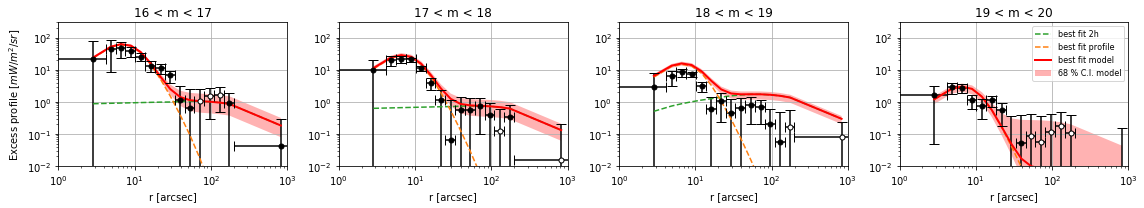

In [17]:
#
from run_fit import *

filt_order = 3
inst = 1
fig, ax = plt.subplots(1, 4, figsize = (16,3))
for im in range(4):
    fitparamdat = get_mcmc_fit_params_2par(inst,im)
    Re2, A2h = fitparamdat['Re2'], fitparamdat['A2h'],
    Re2_low,  A2h_low = fitparamdat['Re2_low'], fitparamdat['A2h_low']
    Re2_high, A2h_high = fitparamdat['Re2_high'], fitparamdat['A2h_high']
    
    profd_arr, profd_err = 0, 0
    profex_arr, profex_arr_low, profex_arr_high = 0, 0, 0
    prof2h_arr, prof2h_arr_low, prof2h_arr_high = 0, 0, 0
    for ifield in [4,5,6,7,8]:
        param_fit = fit_stacking_mcmc(inst, ifield, im, filt_order)

        profd_arri = param_fit.profex_sub
        profd_erri = np.sqrt(np.diag(param_fit.covsub))
        profd_arr += profd_arri / profd_erri**2
        profd_err += 1 / profd_erri**2

        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=0, A2h=A2h)
        profex_arri = modelprof['profex_sub']
        prof2h_arri = modelprof['prof2h_sub']
        profex_arr += profex_arri
        prof2h_arr += prof2h_arri
        
        modelprof = param_fit.get_profexcess_model(Re2=Re2_low, A1h=0, A2h=A2h_low)
        profex_arri = modelprof['profex_sub']
        prof2h_arri = modelprof['prof2h_sub']
        profex_arr_low += profex_arri
        prof2h_arr_low += prof2h_arri

        modelprof = param_fit.get_profexcess_model(Re2=Re2_high, A1h=0, A2h=A2h_high)
        profex_arri = modelprof['profex_sub']
        prof2h_arri = modelprof['prof2h_sub']
        profex_arr_high += profex_arri
        prof2h_arr_high += prof2h_arri

    profex_arr /= 5
    profex_arr_low /= 5
    profex_arr_high /= 5
    prof2h_arr /= 5
    prof2h_arr_low /= 5
    prof2h_arr_high /= 5
    profd_arr /= profd_err
    profd_err = np.sqrt(1 / profd_err)
    
    r_arr = param_fit.rsubbins
    rbinedges = param_fit.rsubbinedges

    ax[im].loglog(r_arr, prof2h_arr,'C2--', label='best fit 2h')
    ax[im].loglog(r_arr, profex_arr,'C1--', label='best fit profile')
    ax[im].loglog(r_arr, profex_arr + prof2h_arr,'r-', lw=2, label='best fit model')
    ax[im].fill_between(r_arr, profex_arr_low + prof2h_arr_low,
                       profex_arr_high + prof2h_arr_high, facecolor='r', alpha=0.3,
                       label='68 % C.I. model')
    
    plot_err_log(r_arr, 
                 profd_arr,
                 profd_err,
                 xedges = rbinedges,
                 ax=ax[im], color='k')

    ax[im].set_title('%d < m < %d'%(param_fit.m_min, param_fit.m_max))
    ax[im].set_ylim([1e-2,3e2])
    ax[im].set_xlim([1e0,1e3])
    ax[im].grid()
    ax[im].set_xlabel('r [arcsec]')
ax[im].legend(fontsize=8,loc=1)
ax[0].set_ylabel('Excess profile [$mW/m^2/sr$]')

plt.tight_layout()
plt.savefig('plots/TM%d/profile_best_joint_2par.png'%inst, dpi = 200, bbox_inches='tight')

### marginalized params

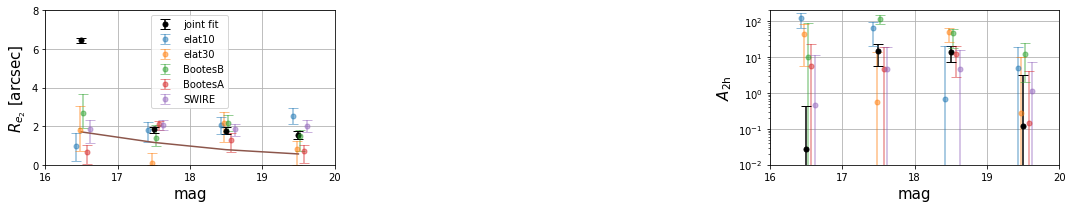

In [32]:
from run_fit import *

inst = 1
fig, ax = plt.subplots(1, 3, figsize = (15,3))
for ifield in [None,4,5,6,7,8]:
    xoff = 0 if ifield is None else (ifield-5.5)*0.05
    Re2_W19_arr = np.zeros(4)
    Re2_arr = np.zeros(4)
    A2h_arr = np.zeros(4)
    Re2_low_arr = np.zeros(4)
    A2h_low_arr = np.zeros(4)
    Re2_high_arr = np.zeros(4)
    A2h_high_arr = np.zeros(4)
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        R200 = gal_profile_model().Wang19_profile(0,im)['params']['R200']
        xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
        Re2_W19 = R200 * xe2_W19
        Re2_W19_arr[im] = Re2_W19

        fitparamdat = get_mcmc_fit_params_2par(inst,im, ifield=ifield)
        Re2_arr[im] = fitparamdat['Re2']
        A2h_arr[im] = fitparamdat['A2h']
        Re2_low_arr[im] = fitparamdat['Re2_low']
        A2h_low_arr[im] = fitparamdat['A2h_low']
        Re2_high_arr[im] = fitparamdat['Re2_high']
        A2h_high_arr[im] = fitparamdat['A2h_high']

    m_arr = (np.array(magbindict['m_min']) + np.array(magbindict['m_max'])) / 2

    if ifield is None:
        ax[0].errorbar(m_arr+xoff, Re2_arr, [Re2_arr - Re2_low_arr, Re2_high_arr - Re2_arr],
                      fmt='.', capsize=5, markersize=10, c='k', label = 'joint fit')
        ax[2].errorbar(m_arr+xoff, A2h_arr, [A2h_arr - A2h_low_arr, A2h_high_arr - A2h_arr],
                      fmt='.', capsize=5, markersize=10, c='k', label = 'joint fit')
    else:
        ax[0].errorbar(m_arr+xoff, Re2_arr, [Re2_arr - Re2_low_arr, Re2_high_arr - Re2_arr],
                      fmt='.', capsize=5, markersize=10, alpha = 0.5, label = fieldnamedict[ifield])
        ax[2].errorbar(m_arr+xoff, A2h_arr, [A2h_arr - A2h_low_arr, A2h_high_arr - A2h_arr],
                      fmt='.', capsize=5, markersize=10, label = fieldnamedict[ifield], alpha = 0.5)

ax[0].plot(m_arr, Re2_W19_arr)
ax[0].set_ylim([0,8])
ax[2].set_ylim([1e-2,2e2])
ax[0].set_xlabel('mag', fontsize=15)
ax[2].set_xlabel('mag', fontsize=15)
ax[0].set_ylabel(r"$R_{e_2}$ [arcsec]", fontsize=15)
ax[2].set_ylabel(r"$A_{\rm 2h}$", fontsize=15)
ax[2].set_yscale('log')
ax[0].set_xticks([16,17,18,19,20])
ax[2].set_xticks([16,17,18,19,20])
ax[0].grid()
ax[2].grid()
ax[1].axis('off')
ax[0].legend()

plt.tight_layout()
# plt.savefig('plots/TM%d/params_best_2par.png'%inst, dpi = 150)

# 3 params old run

### corner

In [ ]:
from run_fit import *
import corner
from PIL import Image

loaddir = '/Users/ytcheng/ciber/python_ciber/stack_modelfit/stack_data_old/'
chaindir = loaddir + 'mcmc_old/'

inst = 1

for ifield in [0,4,5,6,7,8]:
    if ifield==0:
        truths_arr = []
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        
        R200 = gal_profile_model().Wang19_profile(0,im)['params']['R200']
        xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
        Re2_W19 = R200 * xe2_W19
        
        if ifield==0:
            savename = 'mcmc_3par_joint' + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'
        else:
            savename = 'mcmc_3par_' + fieldnamedict[ifield] + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'

        samples = np.load(chain + savename)
        steps, nwalkers, nparams = samples.shape

        flatsamps = samples.copy()
        flatsamps[:,:,0] = flatsamps[:,:,0] * R200
        flatsamps = flatsamps[100:,:,:].reshape((-1,3))

        bins0 = np.linspace(np.min(flatsamps[:,0]), np.max(flatsamps[:,0]), 20)
        bins1 = np.linspace(np.min(flatsamps[:,1]), np.max(flatsamps[:,1]), 20)
        bins2 = np.linspace(np.min(flatsamps[:,2]), np.max(flatsamps[:,2]), 20)
        
        if ifield==0:
            truths_arr.append(np.median(flatsamps, axis=0))

        levels= 1.0 - np.exp(-0.5 * np.arange(1, 2.1, 1) ** 2)
        figure = corner.corner(flatsamps, levels = levels,fill_contours=True,plot_datapoints=False,
                               bins=[bins0, bins1, bins2],label_kwargs={'fontsize':'xx-large'},
                               range=[(0,5),(0,20),(0,200)],
                               title_kwargs={'fontsize':'x-large'},
                               show_titles=True,labels=["$R_{e_2}$", r"$A_{\rm 1h}$", r"$A_{\rm 2h}$"],
                               truths=[Re2_W19,1,1])
        if ifield==0:
            plt.savefig('plots/TM%d/mcmc_joint_m%d_%d.png'\
                        %(inst,m_min, m_max), dpi=150)
        else:
            plt.savefig('plots/TM%d/mcmc_%s_m%d_%d.png'\
                        %(inst,fieldnamedict[ifield], m_min, m_max), dpi=150)

        plt.close()
        

#combine four mag plots into one plot
for ifield in [0,4,5,6,7,8]:
    result = Image.new("RGB", (3200,800))    
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        fieldname = 'joint' if ifield==0 else fieldnamedict[ifield]
        fname = 'plots/TM%d/mcmc_%s_m%d_%d.png'\
                        %(inst, fieldname, m_min, m_max)
        path = os.path.expanduser(fname)
        img = Image.open(path)
        img.thumbnail((800, 800), Image.ANTIALIAS)
        x = im * 800
        y = 0
        w, h = img.size
        result.paste(img, (x, y, x + w, y + h))
        os.remove(fname)
    
    result.save(os.path.expanduser('plots/TM%d/mcmc_%s_3par.png'%(inst,fieldname)))

In [ ]:
from run_fit import *
import corner
from PIL import Image

loaddir = '/Users/ytcheng/ciber/python_ciber/stack_modelfit/stack_data_old/'
chaindir = loaddir + 'mcmc_old/'

inst = 1

for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    figure1, ax = plt.subplots(3,3,figsize=(12,12))
    figure2, ax = plt.subplots(3,3,figsize=(12,12))

    R200 = gal_profile_model().Wang19_profile(0,im)['params']['R200']
    xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
    Re2_W19 = R200 * xe2_W19
    for ifield in [4,5,6,7,8,0]:
        if ifield==0:
            savename = 'mcmc_3par_joint' + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'
            c = 'k'
        else:
            savename = 'mcmc_3par_' + fieldnamedict[ifield] + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'
            c = 'C' + str(ifield-4)

        samples = np.load(chaindir + savename)
        steps, nwalkers, nparams = samples.shape

        flatsamps = samples.copy()
        flatsamps[:,:,0] = flatsamps[:,:,0] * R200
        flatsamps = flatsamps[100:,:,:].reshape((-1,3))

        bins0 = np.linspace(np.min(flatsamps[:,0]), np.max(flatsamps[:,0]), 20)
        bins1 = np.linspace(np.min(flatsamps[:,1]), np.max(flatsamps[:,1]), 20)
        bins2 = np.linspace(np.min(flatsamps[:,2]), np.max(flatsamps[:,2]), 20)
        
        levels= 1.0 - np.exp(-0.5 * np.array([1]) ** 2)
        figure = corner.corner(flatsamps, levels = levels,fill_contours=False,color=c,
                               plot_datapoints=False,
                               bins=[bins0, bins1, bins2],label_kwargs={'fontsize':'xx-large'},
                               range=[(0,5),(0,20),(0,200)],
                               title_kwargs={'fontsize':'x-large'},
                               show_titles=True,labels=["$R_{e_2}$", r"$A_{\rm 1h}$", r"$A_{\rm 2h}$"],
                               fig=figure1)

        levels= 1.0 - np.exp(-0.5 * np.array([2]) ** 2)
        figure = corner.corner(flatsamps, levels = levels,fill_contours=False,color=c,
                               plot_datapoints=False,
                               bins=[bins0, bins1, bins2],label_kwargs={'fontsize':'xx-large'},
                               range=[(0,5),(0,20),(0,200)],
                               title_kwargs={'fontsize':'x-large'},
                               show_titles=True,labels=["$R_{e_2}$", r"$A_{\rm 1h}$", r"$A_{\rm 2h}$"],
                               fig=figure2)
        
    figure1.savefig('plots/TM%d/mcmc_m%d_%d_1sig.png'\
                %(inst, m_min, m_max), dpi=150)
    figure2.savefig('plots/TM%d/mcmc_m%d_%d_2sig.png'\
                %(inst, m_min, m_max), dpi=150)
    
    plt.close(figure1)
    plt.close(figure2)
#combine four mag plots into one plot
result = Image.new("RGB", (3200,800))    
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    fname = 'plots/TM%d/mcmc_m%d_%d_1sig.png'\
                    %(inst, m_min, m_max)
    path = os.path.expanduser(fname)
    img = Image.open(path)
    img.thumbnail((800, 800), Image.ANTIALIAS)
    x = im * 800
    y = 0
    w, h = img.size
    result.paste(img, (x, y, x + w, y + h))
    os.remove(fname)
    
    result.save(os.path.expanduser('plots/TM%d/mcmc_1sig.png'%(inst)))

result = Image.new("RGB", (3200,800))    
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):    
    fname = 'plots/TM%d/mcmc_m%d_%d_2sig.png'\
                    %(inst, m_min, m_max)
    path = os.path.expanduser(fname)
    img = Image.open(path)
    img.thumbnail((800, 800), Image.ANTIALIAS)
    x = im * 800
    y = 0
    w, h = img.size
    result.paste(img, (x, y, x + w, y + h))
    os.remove(fname)
    
    result.save(os.path.expanduser('plots/TM%d/mcmc_2sig.png'%(inst)))

### 1D profile

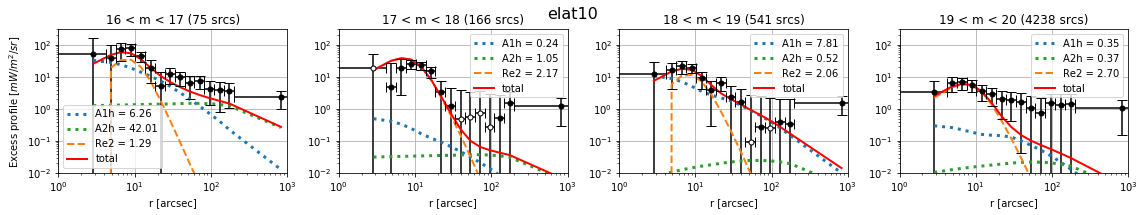

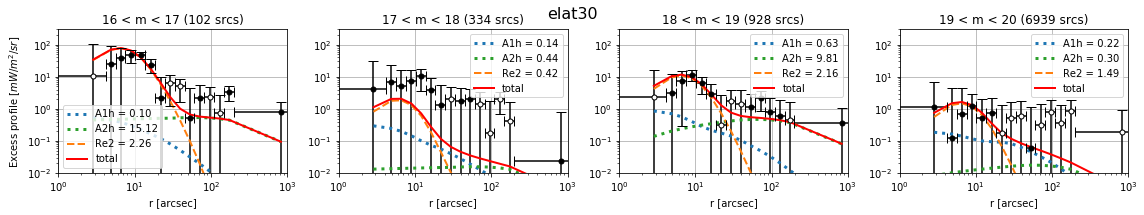

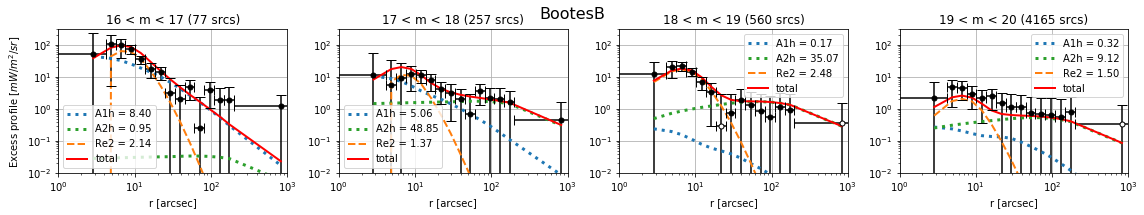

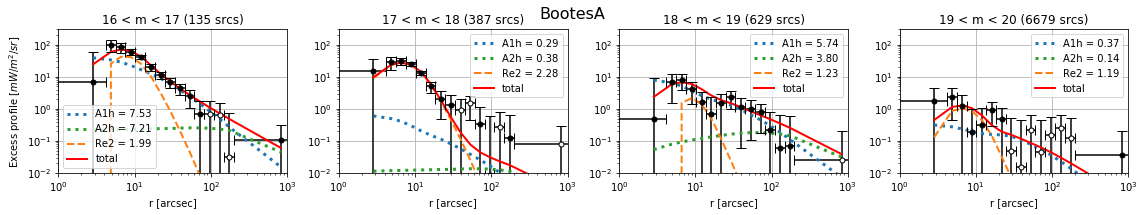

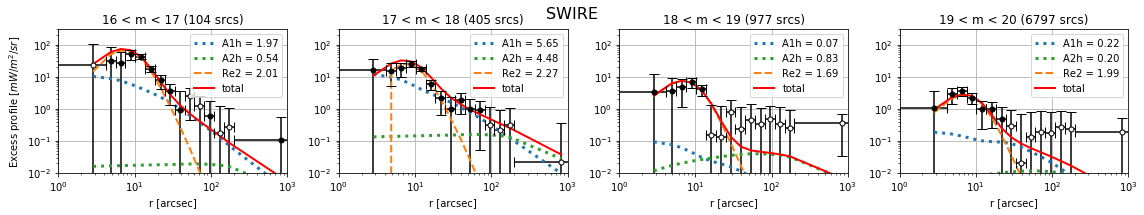

In [4]:
from run_fit import *

loaddir = '/Users/ytcheng/ciber/python_ciber/stack_modelfit/stack_data_old/'
chaindir = loaddir + 'mcmc_old/'
inst = 1
filt_order = 3
for ifield in [4,5,6,7,8]:
    fig, ax = plt.subplots(1, 4, figsize = (16,3))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        param_fit = fit_stacking_mcmc(inst, ifield, im, filt_order, loaddir=loaddir)
        fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=ifield, chaindir=chaindir)
        Re2 = fitparamdat['Re2']
        A1h = fitparamdat['A1h']
        A2h = fitparamdat['A2h']
        Nsrc = param_fit.Nsrc
        r_arr = param_fit.rsubbins
        profd_arr = param_fit.profex_sub
        profd_err = np.sqrt(np.diag(param_fit.covsub))
        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
        profex_arr = modelprof['profex_sub']
        prof1h_arr = modelprof['prof1h_sub']
        prof2h_arr = modelprof['prof2h_sub']
        chi2 = param_fit.get_chi2(Re2=Re2, A1h=A1h, A2h=A2h)
        rbinedges = param_fit.rsubbinedges
        ax[im].loglog(r_arr, prof1h_arr,'C0:', lw=3, label='A1h = %.2f'%A1h)
        ax[im].loglog(r_arr, prof2h_arr,'C2:', lw=3, label='A2h = %.2f'%A2h)
        ax[im].loglog(r_arr, profex_arr,'C1--', lw=2, label='Re2 = %.2f'%Re2)
        ax[im].loglog(r_arr, profex_arr + prof1h_arr + prof2h_arr,'r-', lw=2,
                     label = 'total')
        
        plot_err_log(r_arr, 
                     profd_arr,
                     profd_err,
                     xedges = rbinedges,
                     ax=ax[im], color='k')


        ax[im].set_title('%d < m < %d (%d srcs)'%(m_min, m_max, Nsrc))
        ax[im].set_ylim([1e-2,3e2])
        ax[im].set_xlim([1e0,1e3])
        ax[im].grid()
        ax[im].legend()
        ax[im].set_xlabel('r [arcsec]')
    ax[0].set_ylabel('Excess profile [$mW/m^2/sr$]')
    fig.suptitle(fieldnamedict[ifield], fontsize=16)

    plt.tight_layout()
    plt.savefig('plots/TM%d/profile_best_%s.png'%(inst,param_fit.field), dpi = 150)

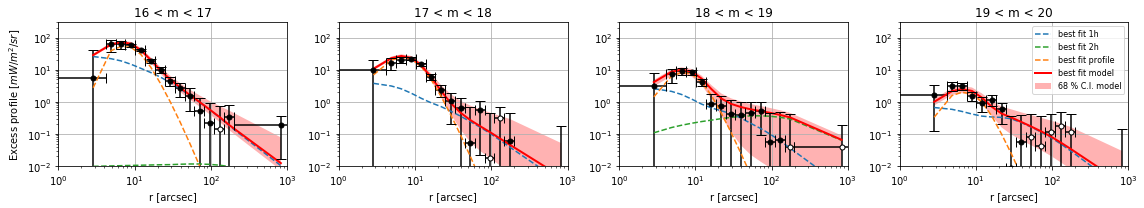

In [6]:
#
from run_fit import *

loaddir = '/Users/ytcheng/ciber/python_ciber/stack_modelfit/stack_data_old/'
chaindir = loaddir + 'mcmc_old/'

filt_order = 3
inst = 1
fig, ax = plt.subplots(1, 4, figsize = (16,3))
for im in range(4):
    fitparamdat = get_mcmc_fit_params_3par(inst,im,chaindir=chaindir)
    Re2, A1h, A2h = fitparamdat['Re2'], fitparamdat['A1h'], fitparamdat['A2h'],
    Re2_low, A1h_low, A2h_low = fitparamdat['Re2_low'], fitparamdat['A1h_low'], fitparamdat['A2h_low']
    Re2_high, A1h_high, A2h_high = fitparamdat['Re2_high'], fitparamdat['A1h_high'], fitparamdat['A2h_high']
    
    profd_arr, profd_err = 0, 0
    profex_arr, profex_arr_low, profex_arr_high = 0, 0, 0
    prof1h_arr, prof1h_arr_low, prof1h_arr_high = 0, 0, 0
    prof2h_arr, prof2h_arr_low, prof2h_arr_high = 0, 0, 0
    for ifield in [4,5,6,7,8]:
        param_fit = fit_stacking_mcmc(inst, ifield, im, filt_order, loaddir=loaddir)
        profd_arri = param_fit.profex_sub
        profd_erri = np.sqrt(np.diag(param_fit.covsub))
        profd_arr += profd_arri / profd_erri**2
        profd_err += 1 / profd_erri**2

        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
        profex_arri = modelprof['profex_sub']
        prof1h_arri = modelprof['prof1h_sub']
        prof2h_arri = modelprof['prof2h_sub']
        profex_arr += profex_arri
        prof1h_arr += prof1h_arri
        prof2h_arr += prof2h_arri
        
        modelprof = param_fit.get_profexcess_model(Re2=Re2_low, A1h=A1h_low, A2h=A2h_low)
        profex_arri = modelprof['profex_sub']
        prof1h_arri = modelprof['prof1h_sub']
        prof2h_arri = modelprof['prof2h_sub']
        profex_arr_low += profex_arri
        prof1h_arr_low += prof1h_arri
        prof2h_arr_low += prof2h_arri

        modelprof = param_fit.get_profexcess_model(Re2=Re2_high, A1h=A1h_high, A2h=A2h_high)
        profex_arri = modelprof['profex_sub']
        prof1h_arri = modelprof['prof1h_sub']
        prof2h_arri = modelprof['prof2h_sub']
        profex_arr_high += profex_arri
        prof1h_arr_high += prof1h_arri
        prof2h_arr_high += prof2h_arri

    profex_arr /= 5
    profex_arr_low /= 5
    profex_arr_high /= 5
    prof1h_arr /= 5
    prof1h_arr_low /= 5
    prof1h_arr_high /= 5
    prof2h_arr /= 5
    prof2h_arr_low /= 5
    prof2h_arr_high /= 5
    profd_arr /= profd_err
    profd_err = np.sqrt(1 / profd_err)
    
    r_arr = param_fit.rsubbins
    rbinedges = param_fit.rsubbinedges

    ax[im].loglog(r_arr, prof1h_arr,'C0--', label='best fit 1h')
    ax[im].loglog(r_arr, prof2h_arr,'C2--', label='best fit 2h')
    ax[im].loglog(r_arr, profex_arr,'C1--', label='best fit profile')
    ax[im].loglog(r_arr, profex_arr + prof1h_arr + prof2h_arr,'r-', lw=2, label='best fit model')
    ax[im].fill_between(r_arr, profex_arr_low + prof1h_arr_low + prof2h_arr_low,
                       profex_arr_high + prof1h_arr_high + prof2h_arr_high, facecolor='r', alpha=0.3,
                       label='68 % C.I. model')
    
    plot_err_log(r_arr, 
                 profd_arr,
                 profd_err,
                 xedges = rbinedges,
                 ax=ax[im], color='k')

    ax[im].set_title('%d < m < %d'%(param_fit.m_min, param_fit.m_max))
    ax[im].set_ylim([1e-2,3e2])
    ax[im].set_xlim([1e0,1e3])
    ax[im].grid()
    ax[im].set_xlabel('r [arcsec]')
ax[im].legend(fontsize=8,loc=1)
ax[0].set_ylabel('Excess profile [$mW/m^2/sr$]')

plt.tight_layout()
plt.savefig('plots/TM%d/profile_best_joint.png'%inst, dpi = 200, bbox_inches='tight')

### marginalized params

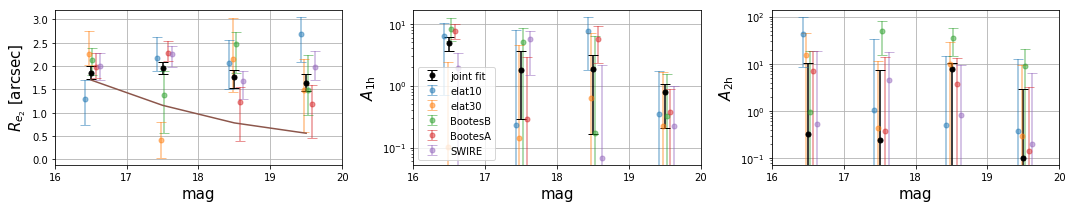

In [2]:
from run_fit import *

loaddir = '/Users/ytcheng/ciber/python_ciber/stack_modelfit/stack_data_old/'
chaindir = loaddir + 'mcmc_old/'

inst = 1
fig, ax = plt.subplots(1, 3, figsize = (15,3))
for ifield in [None,4,5,6,7,8]:
    xoff = 0 if ifield is None else (ifield-5.5)*0.05
    Re2_W19_arr = np.zeros(4)
    Re2_arr = np.zeros(4)
    A1h_arr = np.zeros(4)
    A2h_arr = np.zeros(4)
    Re2_low_arr = np.zeros(4)
    A1h_low_arr = np.zeros(4)
    A2h_low_arr = np.zeros(4)
    Re2_high_arr = np.zeros(4)
    A1h_high_arr = np.zeros(4)
    A2h_high_arr = np.zeros(4)
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        R200 = gal_profile_model().Wang19_profile(0,im)['params']['R200']
        xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
        Re2_W19 = R200 * xe2_W19
        Re2_W19_arr[im] = Re2_W19

        fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=ifield, chaindir=chaindir)
        Re2_arr[im] = fitparamdat['Re2']
        A1h_arr[im] = fitparamdat['A1h']
        A2h_arr[im] = fitparamdat['A2h']
        Re2_low_arr[im] = fitparamdat['Re2_low']
        A1h_low_arr[im] = fitparamdat['A1h_low']
        A2h_low_arr[im] = fitparamdat['A2h_low']
        Re2_high_arr[im] = fitparamdat['Re2_high']
        A1h_high_arr[im] = fitparamdat['A1h_high']
        A2h_high_arr[im] = fitparamdat['A2h_high']

    m_arr = (np.array(magbindict['m_min']) + np.array(magbindict['m_max'])) / 2

    if ifield is None:
        ax[0].errorbar(m_arr+xoff, Re2_arr, [Re2_arr - Re2_low_arr, Re2_high_arr - Re2_arr],
                      fmt='.', capsize=5, markersize=10, c='k')
        ax[1].errorbar(m_arr+xoff, A1h_arr, [A1h_arr - A1h_low_arr, A1h_high_arr - A1h_arr],
                      fmt='.', capsize=5, markersize=10, c='k', label = 'joint fit')
        ax[2].errorbar(m_arr+xoff, A2h_arr, [A2h_arr - A2h_low_arr, A2h_high_arr - A2h_arr],
                      fmt='.', capsize=5, markersize=10, c='k', label = 'joint fit')
    else:
        ax[0].errorbar(m_arr+xoff, Re2_arr, [Re2_arr - Re2_low_arr, Re2_high_arr - Re2_arr],
                      fmt='.', capsize=5, markersize=10, alpha = 0.5)
        ax[1].errorbar(m_arr+xoff, A1h_arr, [A1h_arr - A1h_low_arr, A1h_high_arr - A1h_arr],
                      fmt='.', capsize=5, markersize=10, label = fieldnamedict[ifield], alpha = 0.5)
        ax[2].errorbar(m_arr+xoff, A2h_arr, [A2h_arr - A2h_low_arr, A2h_high_arr - A2h_arr],
                      fmt='.', capsize=5, markersize=10, label = fieldnamedict[ifield], alpha = 0.5)

ax[0].plot(m_arr, Re2_W19_arr)
ax[1].legend()
ax[0].set_xlabel('mag', fontsize=15)
ax[1].set_xlabel('mag', fontsize=15)
ax[2].set_xlabel('mag', fontsize=15)
ax[0].set_ylabel(r"$R_{e_2}$ [arcsec]", fontsize=15)
ax[1].set_ylabel(r"$A_{\rm 1h}$", fontsize=15)
ax[2].set_ylabel(r"$A_{\rm 2h}$", fontsize=15)
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_xticks([16,17,18,19,20])
ax[1].set_xticks([16,17,18,19,20])
ax[2].set_xticks([16,17,18,19,20])
ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.tight_layout()
plt.savefig('plots/TM%d/params_best.png'%inst, dpi = 150)

# Try other MCMC sampling

In [4]:
# from run_fit import *

# sampler0 = fit_stacking_mcmc(1,6,0,3).run_mcmc(nwalkers=50, steps=150, 
#                                                return_sampler=True, save_chain=False,
#                                              moves=[(emcee.moves.StretchMove(), 2)])
# sampler1 = fit_stacking_mcmc(1,6,0,3).run_mcmc(nwalkers=50, steps=150, 
#                                                return_sampler=True, save_chain=False,
#                                              moves=[(emcee.moves.StretchMove(), 10)])
# sampler = fit_stacking_mcmc(1,6,0,3).run_mcmc(nwalkers=100, steps=500, return_sampler=True,
#                                               save_chain=False,moves=[(emcee.moves.DEMove())])
# chain = sampler.get_chain()
# np.save('chain_DEMove',chain)

# sampler = fit_stacking_mcmc(1,6,0,3).run_mcmc(nwalkers=100, steps=500, return_sampler=True,
#                                                save_chain=False,moves=[(emcee.moves.DESnookerMove())])
# chain = sampler.get_chain()
# np.save('chain_DESnookerMove',chain)

# sampler = fit_stacking_mcmc(1,6,0,3).run_mcmc(nwalkers=100, steps=500, return_sampler=True,
#                                                save_chain=False,moves=[(emcee.moves.KDEMove())])
# chain = sampler.get_chain()
# np.save('chain_KDEMove',chain)

# sampler = fit_stacking_mcmc(1,6,0,3).run_mcmc(nwalkers=100, steps=500, return_sampler=True,
#                                                save_chain=False,moves=[(emcee.moves.WalkMove())])
# chain = sampler.get_chain()
# np.save('chain_WalkMove',chain)

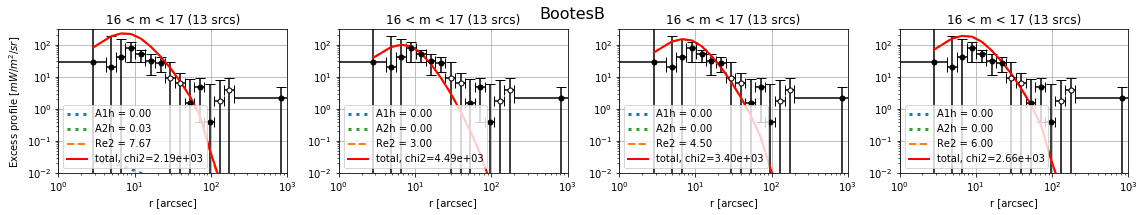

In [8]:
from run_fit import *

inst = 1
filt_order = 3
ifield = 6
im = 0
m_min, m_max = magbindict['m_min'][im],magbindict['m_max'][im]

fig, ax = plt.subplots(1, 4, figsize = (16,3))

param_fit = fit_stacking_mcmc(inst, ifield, im, filt_order)
fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=ifield)

Nsrc = param_fit.Nsrc
r_arr = param_fit.rsubbins
profd_arr = param_fit.profex_sub
profd_err = np.sqrt(np.diag(param_fit.covsub))
rbinedges = param_fit.rsubbinedges

for i in range(4):
    plot_err_log(r_arr, 
                 profd_arr,
                 profd_err,
                 xedges = rbinedges,
                 ax=ax[i], color='k')
    ax[i].set_title('%d < m < %d (%d srcs)'%(m_min, m_max, Nsrc))
    ax[i].set_ylim([1e-2,3e2])
    ax[i].set_xlim([1e0,1e3])
    ax[i].grid()
    ax[i].set_xlabel('r [arcsec]')

i = 0
Re2, A1h, A2h = fitparamdat['Re2'], fitparamdat['A1h'], fitparamdat['A2h']
modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
profex_arr = modelprof['profex_sub']
prof1h_arr = modelprof['prof1h_sub']
prof2h_arr = modelprof['prof2h_sub']
chi2 = param_fit.get_chi2(Re2=Re2, A1h=A1h, A2h=A2h)
ax[i].loglog(r_arr, prof1h_arr,'C0:', lw=3, label='A1h = %.2f'%A1h)
ax[i].loglog(r_arr, prof2h_arr,'C2:', lw=3, label='A2h = %.2f'%A2h)
ax[i].loglog(r_arr, profex_arr,'C1--', lw=2, label='Re2 = %.2f'%Re2)
ax[i].loglog(r_arr, profex_arr + prof1h_arr + prof2h_arr,'r-', lw=2,
             label = 'total, chi2=%.2e'%chi2)
ax[i].legend()

i = 1
Re2, A1h, A2h = 3, 0, 0
modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
profex_arr = modelprof['profex_sub']
prof1h_arr = modelprof['prof1h_sub']
prof2h_arr = modelprof['prof2h_sub']
chi2 = param_fit.get_chi2(Re2=Re2, A1h=A1h, A2h=A2h)
ax[i].loglog(r_arr, prof1h_arr,'C0:', lw=3, label='A1h = %.2f'%A1h)
ax[i].loglog(r_arr, prof2h_arr,'C2:', lw=3, label='A2h = %.2f'%A2h)
ax[i].loglog(r_arr, profex_arr,'C1--', lw=2, label='Re2 = %.2f'%Re2)
ax[i].loglog(r_arr, profex_arr + prof1h_arr + prof2h_arr,'r-', lw=2,
             label = 'total, chi2=%.2e'%chi2)
ax[i].legend()

i = 2
Re2, A1h, A2h = 4.5, 0, 0
modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
profex_arr = modelprof['profex_sub']
prof1h_arr = modelprof['prof1h_sub']
prof2h_arr = modelprof['prof2h_sub']
chi2 = param_fit.get_chi2(Re2=Re2, A1h=A1h, A2h=A2h)
ax[i].loglog(r_arr, prof1h_arr,'C0:', lw=3, label='A1h = %.2f'%A1h)
ax[i].loglog(r_arr, prof2h_arr,'C2:', lw=3, label='A2h = %.2f'%A2h)
ax[i].loglog(r_arr, profex_arr,'C1--', lw=2, label='Re2 = %.2f'%Re2)
ax[i].loglog(r_arr, profex_arr + prof1h_arr + prof2h_arr,'r-', lw=2,
             label = 'total, chi2=%.2e'%chi2)
ax[i].legend()

i = 3
Re2, A1h, A2h = 6, 0, 0
modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
profex_arr = modelprof['profex_sub']
prof1h_arr = modelprof['prof1h_sub']
prof2h_arr = modelprof['prof2h_sub']
chi2 = param_fit.get_chi2(Re2=Re2, A1h=A1h, A2h=A2h)
ax[i].loglog(r_arr, prof1h_arr,'C0:', lw=3, label='A1h = %.2f'%A1h)
ax[i].loglog(r_arr, prof2h_arr,'C2:', lw=3, label='A2h = %.2f'%A2h)
ax[i].loglog(r_arr, profex_arr,'C1--', lw=2, label='Re2 = %.2f'%Re2)
ax[i].loglog(r_arr, profex_arr + prof1h_arr + prof2h_arr,'r-', lw=2,
             label = 'total, chi2=%.2e'%chi2)
ax[i].legend()


ax[0].set_ylabel('Excess profile [$mW/m^2/sr$]')
fig.suptitle(fieldnamedict[ifield], fontsize=16)

plt.tight_layout()
# plt.savefig('/Users/ytcheng/Desktop/BootesB_test_chi2.png', dpi = 150)

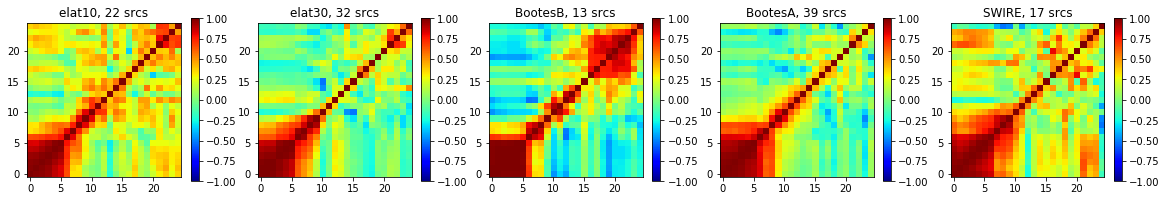

In [7]:
fig, ax = plt.subplots(1,5,figsize=(20,3))
for i,ifield in enumerate([4,5,6,7,8]):
    stackdat = stacking(1,ifield,16,17,filt_order=3,load_from_file=True, BGsub=False).stackdat
    imageclip(stackdat['excov']['profcb_rho'],vmin=-1, vmax=1,ax=ax[i])
    ax[i].set_title('%s, %d srcs'%(stackdat['field'],stackdat['Nsrc']))
# plt.savefig('/Users/ytcheng/Desktop/BootesB_test_cov.png', dpi = 150)

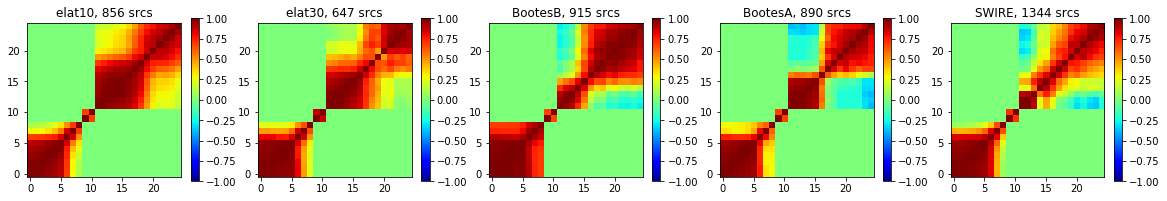

In [4]:
fig, ax = plt.subplots(1,5,figsize=(20,3))
for i,ifield in enumerate([4,5,6,7,8]):
    stackdat = stacking(1,ifield,16,17,filt_order=3,load_from_file=True, BGsub=False).stackdat
    imageclip(stackdat['PSFcov']['profcb_rho'],vmin=-1, vmax=1,ax=ax[i])
    ax[i].set_title('%s, %d srcs'%(stackdat['field'],stackdat['PSF']['Nsrc']))
# plt.savefig('/Users/ytcheng/Desktop/BootesB_test_cov.png', dpi = 150)

In [7]:
from psfsynth import *

inst = 2
m_min = 16
fname = mypaths['alldat'] + 'TM'+ str(inst) + \
'/psfdata_synth_%s.pkl'%('SWIRE')
with open(fname, "rb") as f:
    profdat = pickle.load(f)
print(fname)
print(list(profdat))
# Nsrc = profdat[m_min-16]['Nsrc']
# psfdat = profdat[m_min-16]['comb']

/Users/ytcheng/ciber/doc/20170325_alldat/TM2/psfdata_synth_SWIRE.pkl
[0, 1, 'rbinedges', 3, 'rsubbinedges', 'rsubbins', 'in', 'rbins', 2, 'mid']


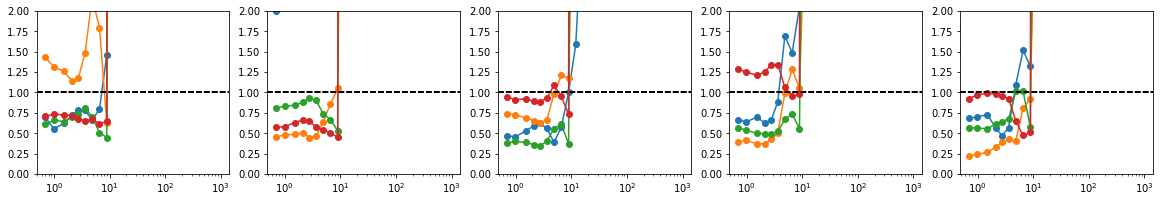

In [60]:
fig, ax = plt.subplots(1,5,figsize=(20,3))
for i,ifield in enumerate([4,5,6,7,8]):
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        stackdat = stacking(1,ifield,m_min,m_max,filt_order=3,
                            load_from_file=True, BGsub=False).stackdat
        gal_var = np.diag(stackdat['cov']['profcb'])
        psf_var = np.diag(stackdat['PSFcov']['profcb'])
        r_var = gal_var / psf_var 
        r_N = stackdat['PSF']['Nsrc'] / stackdat['Nsrc']
        ax[i].semilogx(stackdat['rbins'],r_var/r_N,'o-')
        ax[i].axhline(1,c='k',ls='--')
        ax[i].set_ylim([0, 2])

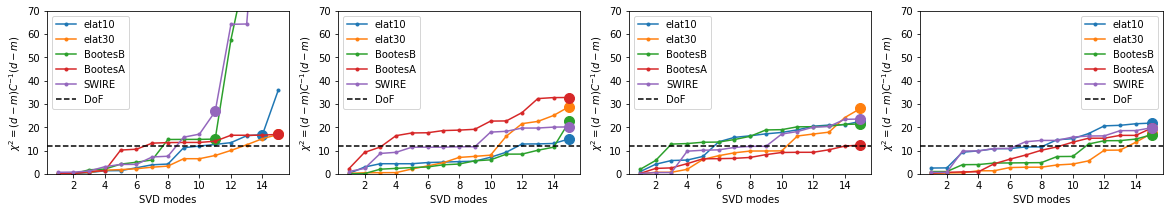

In [10]:
from stack import *
from run_fit import *
inst = 1
filt_order = 3

fig, ax = plt.subplots(1, 4, figsize = (20,3))
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    R200 = gal_profile_model().Wang19_profile(0,im)['params']['R200']
    xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
    Re2_W19 = R200 * xe2_W19
    for ifield in [4,5,6,7,8]:        
        param_fit = fit_stacking_mcmc(inst, ifield, im, filt_order)
        modelprof = param_fit.get_profexcess_model(Re2=Re2_W19, A1h=1, A2h=1)
        M = modelprof['profex_sub'] + modelprof['prof1h_sub'] + modelprof['prof2h_sub']
        D = param_fit.profex_sub
        Cov = param_fit.covsub
        Covi, Nmode = param_fit.covsub_inv, param_fit.covsub_inv_Nmode
        ax[im].plot([Nmode],[param_fit.get_chi2(Re2=Re2_W19, A1h=1, A2h=1)],
                   'o',C='C'+str(ifield-4),markersize=10)
        # SVD
        U, s, VT = np.linalg.svd(Cov)
        V = VT.T
        UT = U.T
        S = np.diag(s)
        Sinv  = np.diag(1/s)
        chi2_arr = []
        for Nmode in np.arange(len(s))+1:
            Cov_svd = U[:,:Nmode]@S[:Nmode,:Nmode]@VT[:Nmode,:]
            Covi_svd = V[:,:Nmode]@Sinv[:Nmode,:Nmode]@UT[:Nmode,:]

            chi2_mat_svd = Covi_svd * ((D-M)[:,np.newaxis] @ (D-M)[:,np.newaxis].T)
            chi2_arr.append(np.sum(chi2_mat_svd))   
        
        ax[im].plot(np.arange(len(s))+1, chi2_arr,'.-',label=param_fit.field,C='C'+str(ifield-4))
        
        
    ax[im].set_ylabel(r'$\chi^2 = (d-m)C^{-1}(d-m)$')
    ax[im].set_xlabel('SVD modes')
    ax[im].axhline(len(s)-3,c='k',ls='--',label='DoF')
    ax[im].set_ylim([0,70])
    ax[im].legend()

In [3]:
from run_fit import *
sampler = fit_stacking_mcmc(1,8,0,3).run_mcmc()

100%|██████████| 30/30 [13:10<00:00, 26.36s/it]


(0, 0.1)

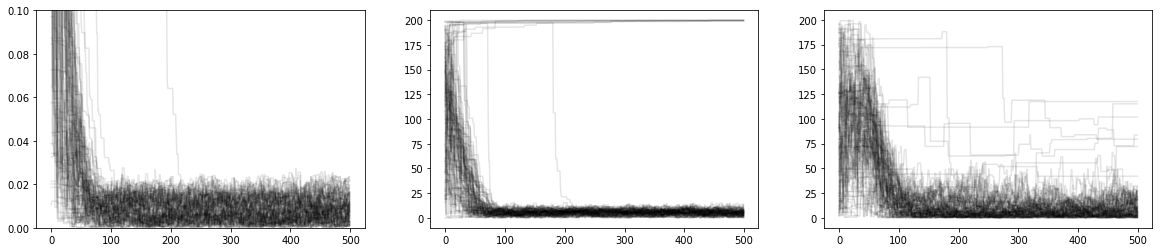

In [16]:
chain = np.load('/Users/ytcheng/ciber/doc/20170325_alldat/TM1/mcmc_3par_SWIRE_m16_17.npy')
fig, ax = plt.subplots(1,3,figsize=(20,4))
for i in range(chain.shape[1]):

    ax[0].plot(chain[:,i,0],'k',alpha=0.1)
    ax[1].plot(chain[:,i,1],'k',alpha=0.1)
    ax[2].plot(chain[:,i,2],'k',alpha=0.1)
ax[0].set_ylim([0,0.1])
# ax[1].set_ylim([0,3])
# ax[2].set_ylim([0,10])

(0, 10)

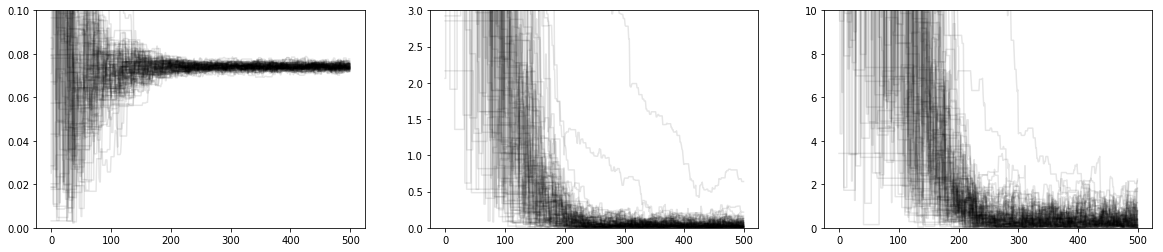

In [6]:
# chain = np.load('chain_DEMove.npy')
fig, ax = plt.subplots(1,3,figsize=(20,4))
for i in range(chain.shape[1]):

    ax[0].plot(chain[:,i,0],'k',alpha=0.1)
    ax[1].plot(chain[:,i,1],'k',alpha=0.1)
    ax[2].plot(chain[:,i,2],'k',alpha=0.1)
ax[0].set_ylim([0,0.1])
ax[1].set_ylim([0,3])
ax[2].set_ylim([0,10])